### DataAnalyses

things that we need to add: 
From lecture 10 : 
- Common classification metrics include accuracy, precision, recall, and F1 score
- maybe make some confusion matrix 
- ROC-AUC Curve, it is done after the prediction 
- Precision-Recall curve 
- Probability density
- Cross-Validation : Technique used for assessing the performance and generalization of a predictive model.
From lecture 11 : 
- make different graphs for the KNN as in the screenshot 
Fromt lecture 12 : 
- Popular method: Classification and Regression Trees (CART), Breiman, Friedman, Olshen and Stone (1984). 
- we can add gradient boosting classifier 




some insights : 
- correlation of different features to the results 
- clarify why we have such results fr the graph 
- how each feature effect to the technique , very important to make general assumption 
- he asked about relatioships with feauture , with correlation 
- regression should not be too perfect 
- how is models misstrained 
- grid 
- retraining the model 
- confusion matrix for the prediction 
- the most impact while predictiong something 




## Libraries


In [25]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, mean_absolute_error

In [26]:
# Dataset
df = pd.read_csv("DataSet/googleplaystore.csv")
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [27]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [29]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data cleaning 

In [ ]:

# Drop rows with any missing values
df = df.dropna()

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)


df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)


df['Size'] = df['Size'].astype(str).str.replace('M', '').str.replace('k', '')
df['Size'] = df['Size'].replace('Varies with device', np.nan)  # Optional: replace with NaN
df['Size'] = df['Size'].str.strip()

df['Android Ver'] = df['Android Ver'].astype(str).str.replace(' and up', '', regex=False).str.strip()
df['Current Ver'] = df['Current Ver'].astype(str).str.strip()

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Reviews'] = df['Reviews'].astype(str).str.replace(r'[^\d]', '', regex=True).str.strip()

df['Genres'] = df['Genres'].astype(str).str.strip()
df['Content Rating'] = df['Content Rating'].astype(str).str.strip()
df['Type'] = df['Type'].astype(str).str.strip()
df['Category'] = df['Category'].astype(str).str.strip()



df= df.dropna(subset=['Size', 'Category'])

df = df.reset_index(drop=True)

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


### Data analyses 

### Data encoding  FINAL

In [ ]:

price_before = df['Price'].copy()
price_converted = pd.to_numeric(price_before, errors='coerce')


num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")



df = df.dropna(subset=['Rating', 'Installs', 'Type', 'Content Rating'])


df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

df['Size'] = df['Size'].replace('Varies with device', np.nan) 
#дальше тут работа с ценой

df['Price'] = df['Price'].fillna('0') 

def parse_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024
    return np.nan


df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)




price_before = df['Price'].copy()

price_converted = pd.to_numeric(price_before, errors='coerce')

num_invalid = price_converted.isna().sum()
total = len(price_before)
le = LabelEncoder()
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
latest_date = df['Last Updated'].max()
df['Days Since Update'] = (latest_date - df['Last Updated']).dt.days
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df = df.dropna(subset=['Installs'])


df['Installs'] = df['Installs'].astype(int)
df.info()

def get_success_level(installs):
    if installs <= 10000:
        return 'Not Successful'
    elif installs <= 100000:
        return 'Average'
    elif installs <= 1000000:
        return 'Above Average'
    else:
        return 'Successful'

df['Success_Level'] = df['Installs'].apply(get_success_level)

le = LabelEncoder()
df['Success_Level_Encoded'] = le.fit_transform(df['Success_Level'])

df["Success_Level_Encoded"].value_counts
df.head()

Некорректных значений: 0 из 7723 (0.00%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                7723 non-null   object        
 1   Category           7723 non-null   object        
 2   Rating             7723 non-null   float64       
 3   Reviews            7723 non-null   int64         
 4   Size               7723 non-null   float64       
 5   Installs           7723 non-null   int64         
 6   Type               7723 non-null   object        
 7   Price              7723 non-null   float64       
 8   Content Rating     7723 non-null   object        
 9   Genres             7723 non-null   object        
 10  Last Updated       7723 non-null   datetime64[ns]
 11  Current Ver        7723 non-null   object        
 12  Android Ver        7723 non-null   object        
 13  Days Since Update  772

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days Since Update,Success_Level,Success_Level_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,213,Not Successful,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,205,Above Average,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,7,Successful,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,61,Successful,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,49,Average,1


In [33]:
df_tree = df.copy()
from sklearn.preprocessing import LabelEncoder

label_cols = ['Category', 'Type', 'Content Rating', 'Android Ver', 'Genres']
le = LabelEncoder()

for col in label_cols:
    df_tree[col] = le.fit_transform(df_tree[col].astype(str))
df_tree.head()
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    7723 non-null   object        
 1   Category               7723 non-null   int64         
 2   Rating                 7723 non-null   float64       
 3   Reviews                7723 non-null   int64         
 4   Size                   7723 non-null   float64       
 5   Installs               7723 non-null   int64         
 6   Type                   7723 non-null   int64         
 7   Price                  7723 non-null   float64       
 8   Content Rating         7723 non-null   int64         
 9   Genres                 7723 non-null   int64         
 10  Last Updated           7723 non-null   datetime64[ns]
 11  Current Ver            7723 non-null   object        
 12  Android Ver            7723 non-null   int64         
 13  Day

In [34]:
df_linear = df.copy()
df_linear = pd.get_dummies(df_linear, columns=['Category', 'Type', 'Content Rating', 'Android Ver', 'Genres'], drop_first=True)
df_linear.head()



,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Days Since Update,Success_Level,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,2018-01-07,1.0.0,213,Not Successful,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,500000,0.0,2018-01-15,2.0.0,205,Above Average,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,2018-08-01,1.2.4,7,Successful,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,2018-06-08,Varies with device,61,Successful,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,2018-06-20,1.1,49,Average,...,False,False,False,False,False,False,False,False,False,False


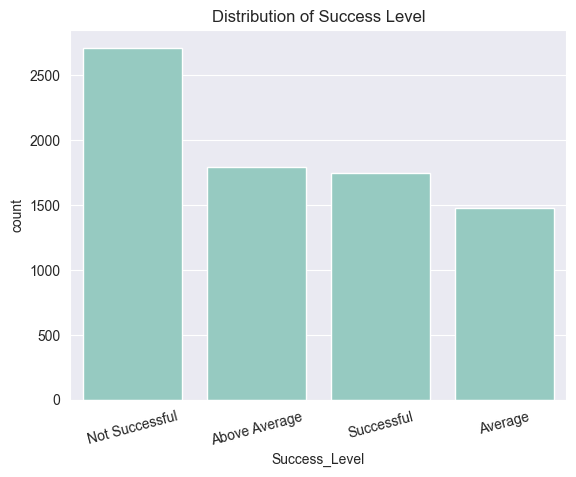

Success_Level_Encoded
2    2711
0    1791
3    1748
1    1473
Name: count, dtype: int64

In [35]:
sns.countplot(data=df, x='Success_Level')
plt.title('Distribution of Success Level')
plt.xticks(rotation=15)
plt.show()

df['Success_Level'].value_counts()
df['Success_Level_Encoded'].value_counts()

In [36]:
print(df[['Success_Level', 'Success_Level_Encoded']].head())
print(df['Success_Level'].value_counts())
print(df['Success_Level_Encoded'].value_counts())


    Success_Level  Success_Level_Encoded
0  Not Successful                      2
1   Above Average                      0
2      Successful                      3
3      Successful                      3
4         Average                      1
Success_Level
Not Successful    2711
Above Average     1791
Successful        1748
Average           1473
Name: count, dtype: int64
Success_Level_Encoded
2    2711
0    1791
3    1748
1    1473
Name: count, dtype: int64


# Data analyses 

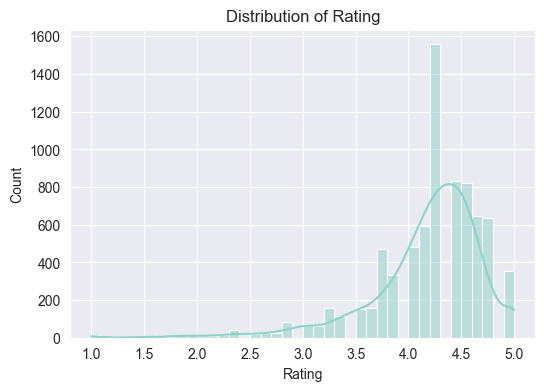

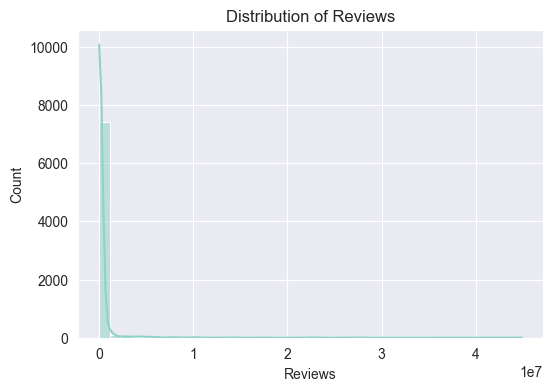

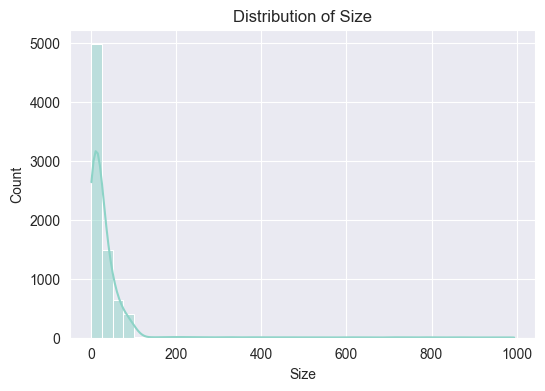

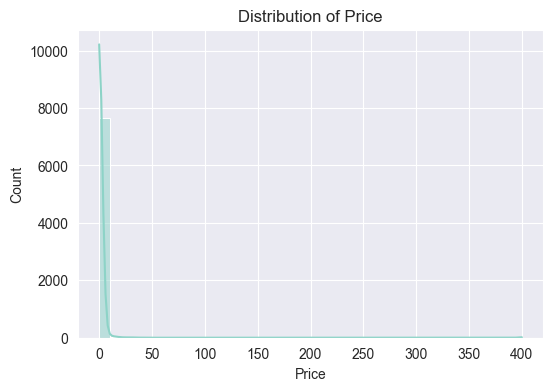

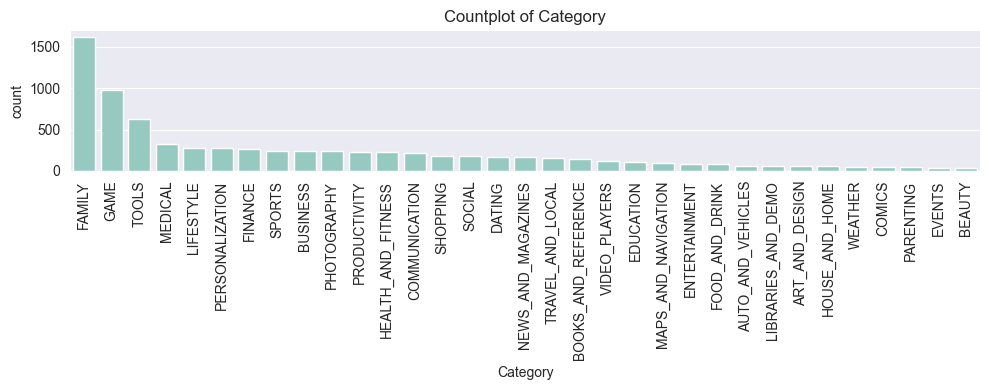

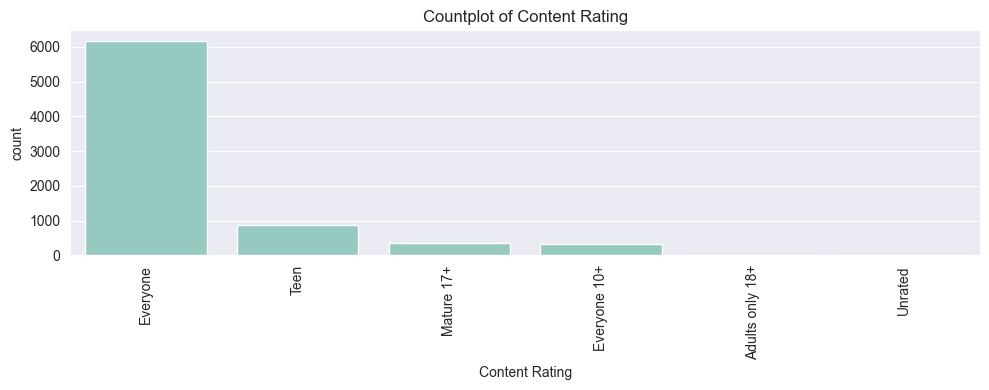

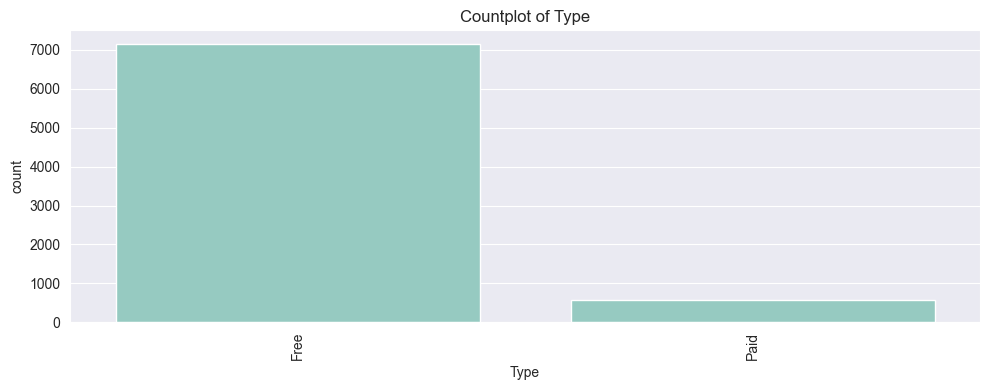

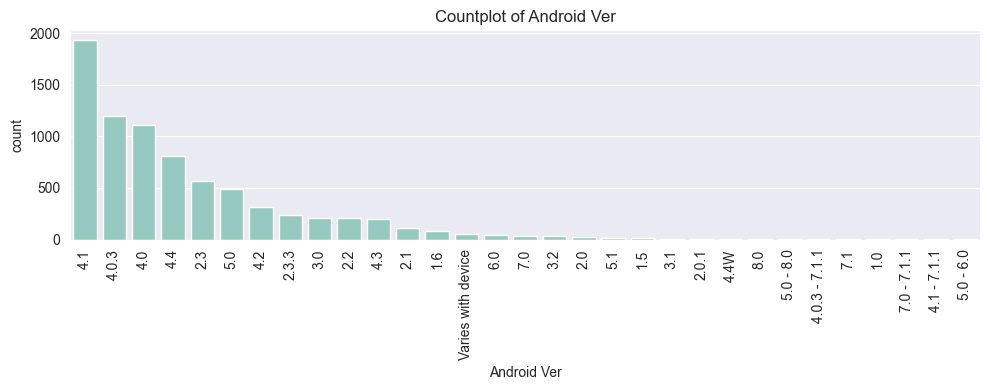

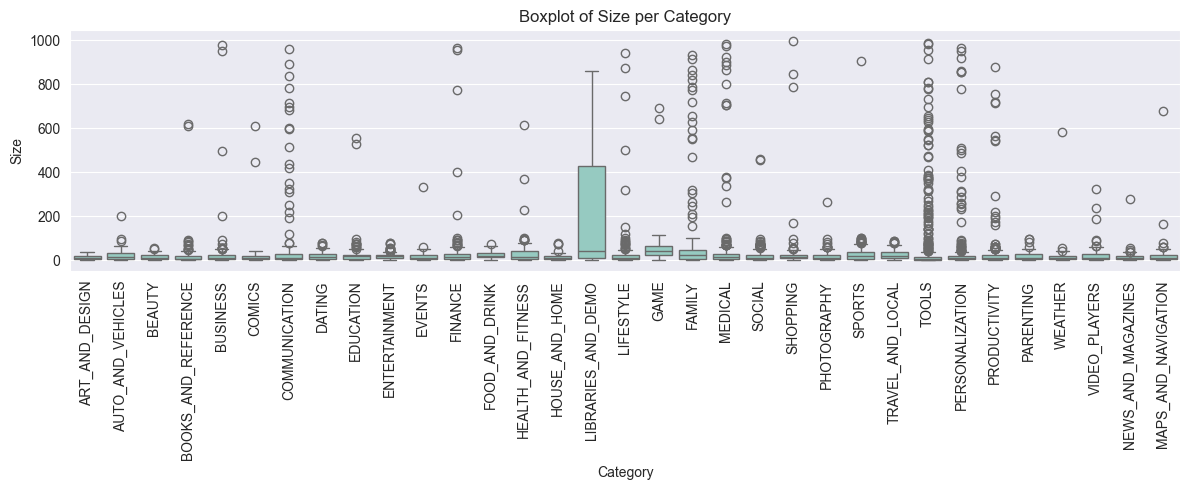

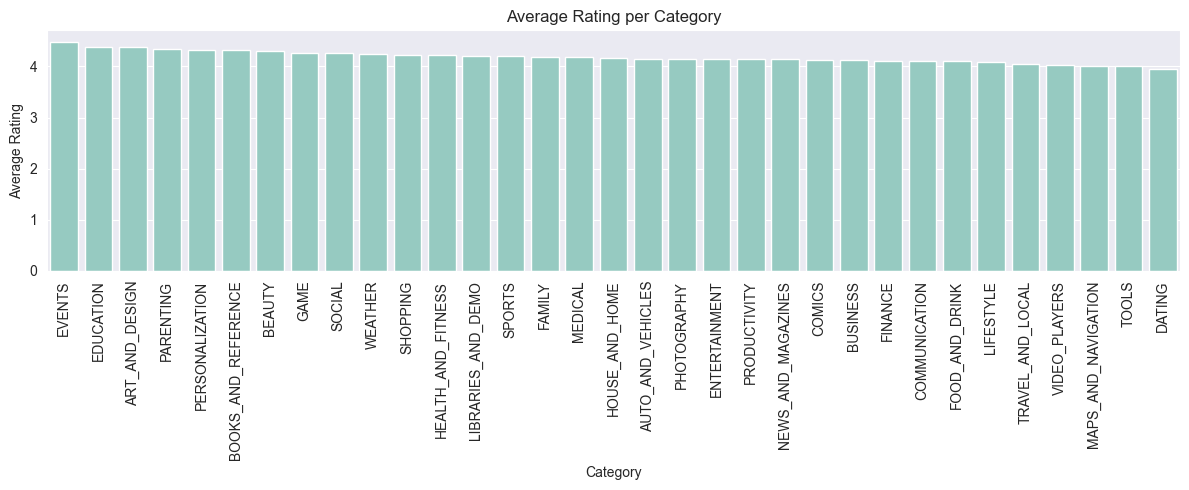

In [ ]:


num_features = ['Rating', 'Reviews', 'Size', 'Price']
df[num_features] = df[num_features].apply(pd.to_numeric, errors='coerce')

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


cat_features = ['Category', 'Content Rating', 'Type', 'Android Ver']
for col in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Category', y='Size')
plt.xticks(rotation=90)
plt.title('Boxplot of Size per Category')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=90)
plt.ylabel("Average Rating")
plt.title("Average Rating per Category")
plt.tight_layout()
plt.show()

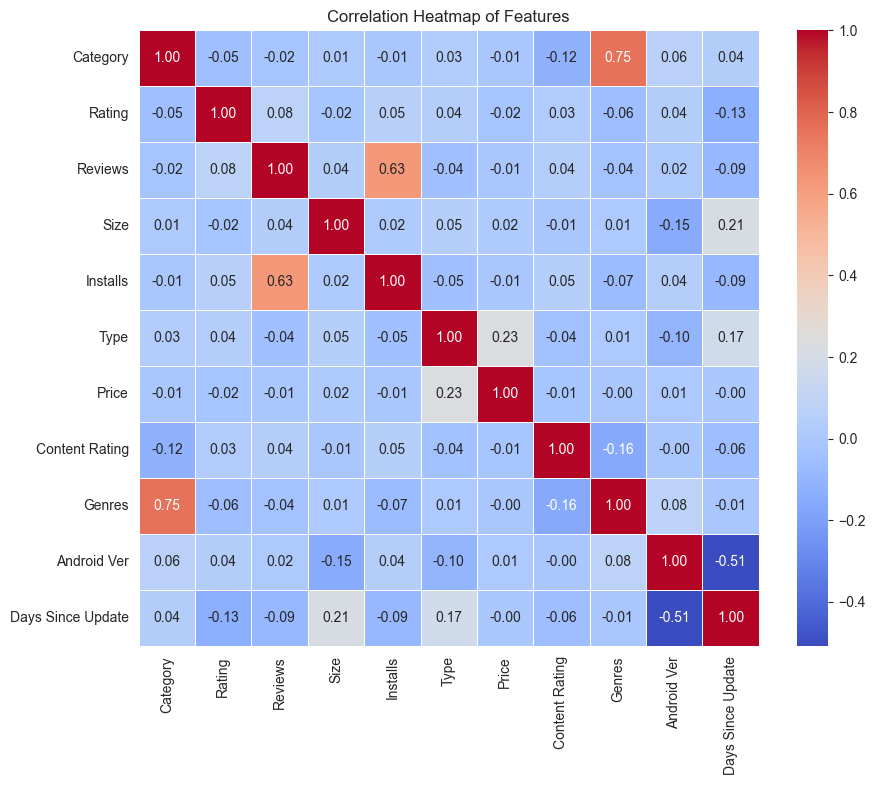

In [ ]:

numeric_df = df_tree
numeric_df = numeric_df.drop(['Success_Level_Encoded', 'Success_Level','App','Last Updated','Current Ver'], axis=1)


corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Features')


plt.show()


# Techniques usage

/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/1384196692.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


🎯 Accuracy (Logistic Regression): 0.5754045307443366

📋 Classification Report:
                 precision    recall  f1-score   support

 Above Average       0.45      0.45      0.45       376
       Average       0.40      0.11      0.17       300
Not Successful       0.54      0.81      0.65       526
    Successful       0.88      0.76      0.82       343

      accuracy                           0.58      1545
     macro avg       0.57      0.53      0.52      1545
  weighted avg       0.57      0.58      0.54      1545



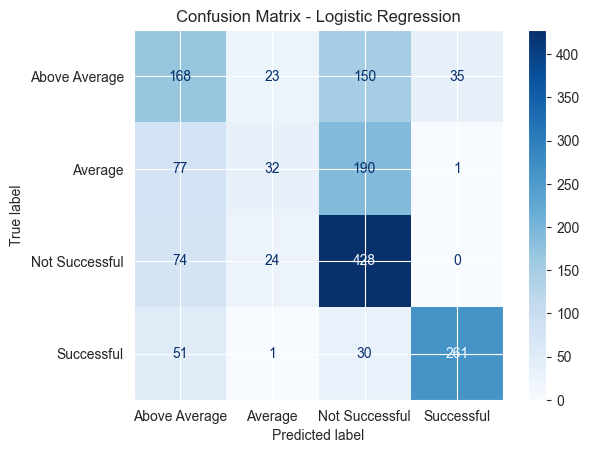

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df = df_linear.copy()


df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])


X = df.drop('Success_Level', axis=1)
y = df['Success_Level']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_d)
X_test_scaled = scaler.transform(X_test_d)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_d)


y_pred_log = log_reg.predict(X_test_scaled)

print("Accuracy (Logistic Regression):", accuracy_score(y_test_d, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_log))

disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test_d, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()


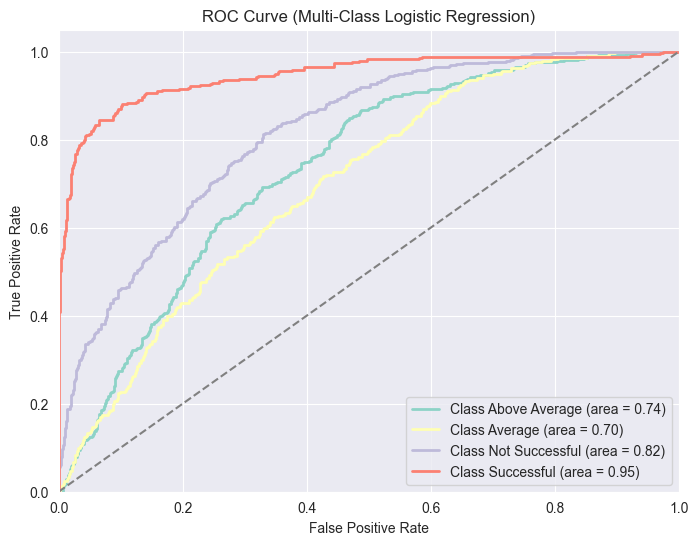

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test_d, classes=log_reg.classes_)
y_prob_bin = log_reg.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))
for i in range(len(log_reg.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {log_reg.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-Class Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


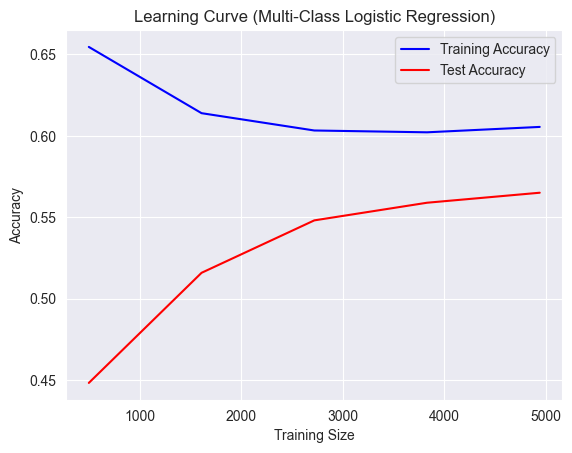

In [41]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_scaled, y_train_d, cv=5, n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='red')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Multi-Class Logistic Regression)')
plt.legend(loc='best')
plt.show()


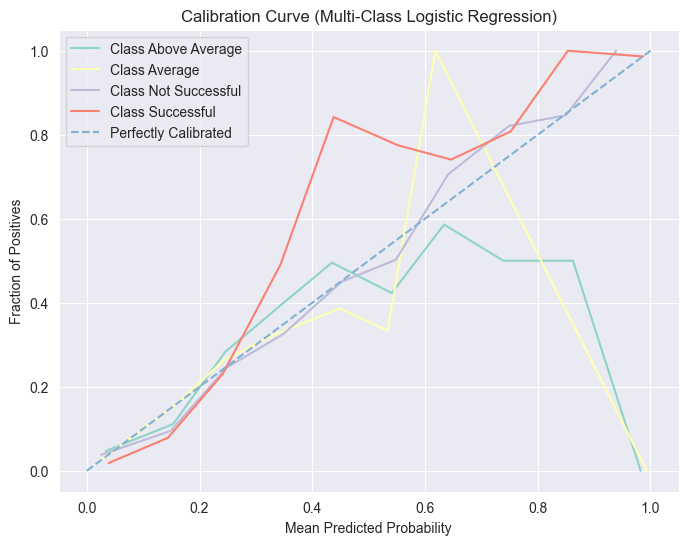

In [42]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for i in range(len(log_reg.classes_)):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_bin[:, i], y_prob_bin[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, label=f'Class {log_reg.classes_[i]}')

plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated")
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Multi-Class Logistic Regression)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


coef = log_reg.coef_  
feature_names = X.columns

mean_coef = np.mean(np.abs(coef), axis=0)

# Группировка по "основным" категориям
feature_groups = feature_names.str.extract(r'(^[^_]+)') 
aggregated = pd.DataFrame({'Group': feature_groups[0], 'Importance': mean_coef})
grouped_importance = aggregated.groupby('Group').sum().sort_values(by='Importance', ascending=False).reset_index()


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/607453827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_importance.head(20), x='Importance', y='Group', palette='viridis')
/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/607453827.py:8: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/607453827.py:8: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-pac

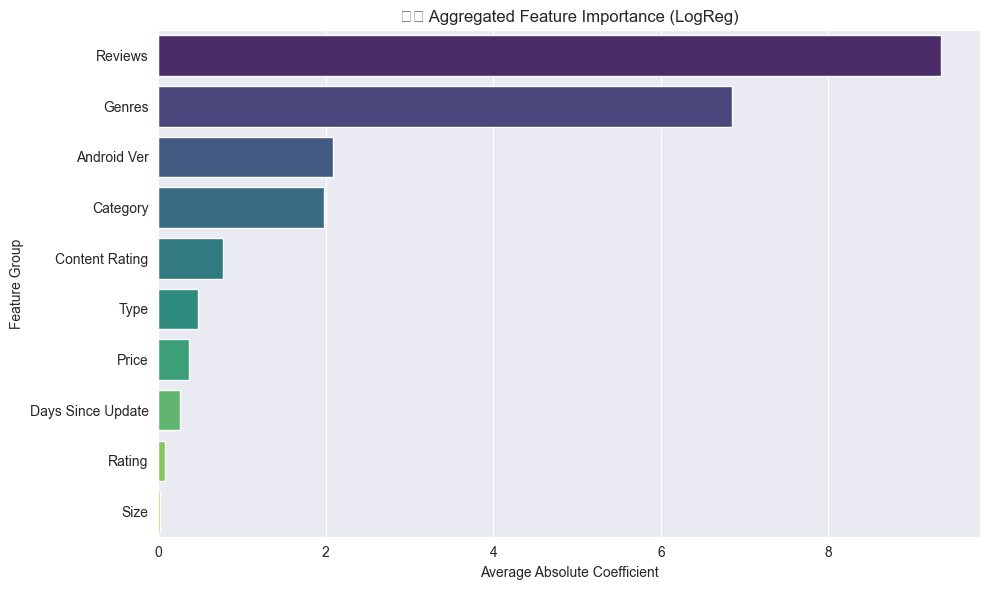

In [44]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_importance.head(20), x='Importance', y='Group', palette='viridis')
plt.title("🏷️ Aggregated Feature Importance (LogReg)")
plt.xlabel("Average Absolute Coefficient")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


## SVM


In [45]:
df_linear.head()

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Days Since Update,Success_Level,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,2018-01-07,1.0.0,213,Not Successful,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,500000,0.0,2018-01-15,2.0.0,205,Above Average,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,2018-08-01,1.2.4,7,Successful,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,2018-06-08,Varies with device,61,Successful,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,2018-06-20,1.1,49,Average,...,False,False,False,False,False,False,False,False,False,False


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/1325971251.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


🎯 Accuracy (SVM): 0.5585760517799353

📋 Classification Report:
                 precision    recall  f1-score   support

 Above Average       0.46      0.38      0.42       376
       Average       0.40      0.09      0.15       300
Not Successful       0.50      0.84      0.62       526
    Successful       0.92      0.72      0.81       343

      accuracy                           0.56      1545
     macro avg       0.57      0.51      0.50      1545
  weighted avg       0.56      0.56      0.52      1545



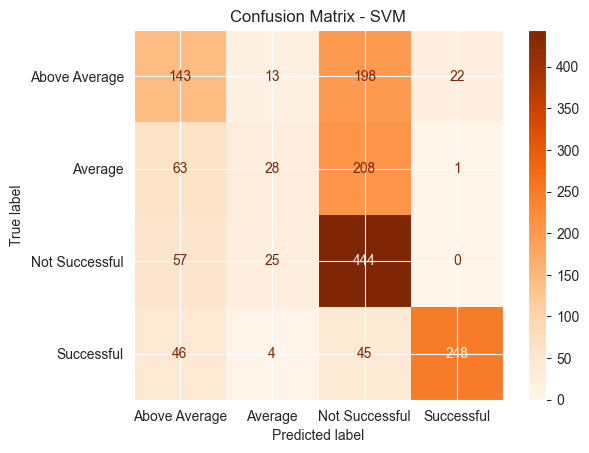

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = df_linear.copy()
df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])


X = df.drop('Success_Level', axis=1)
y = df['Success_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_clf = SVC(kernel='linear', decision_function_shape='ovr')  # Можно поменять kernel на 'rbf', 'poly' и т.п.
svm_clf.fit(X_train_scaled, y_train)


y_pred_svm = svm_clf.predict(X_test_scaled)


print(" Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))


disp = ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, cmap=plt.cm.Oranges)
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()


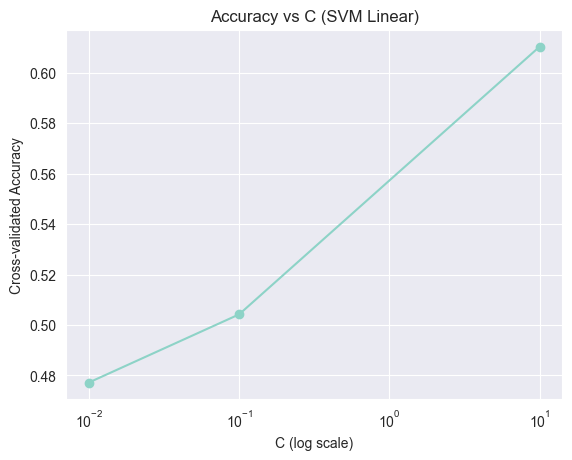

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




param_grid = {'C': [0.01, 0.1,10]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# График
C_values = param_grid['C']
mean_scores = grid_search.cv_results_['mean_test_score']

plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validated Accuracy')
plt.title('Accuracy vs C (SVM Linear)')
plt.grid(True)
plt.show()


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_3542/3247747122.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

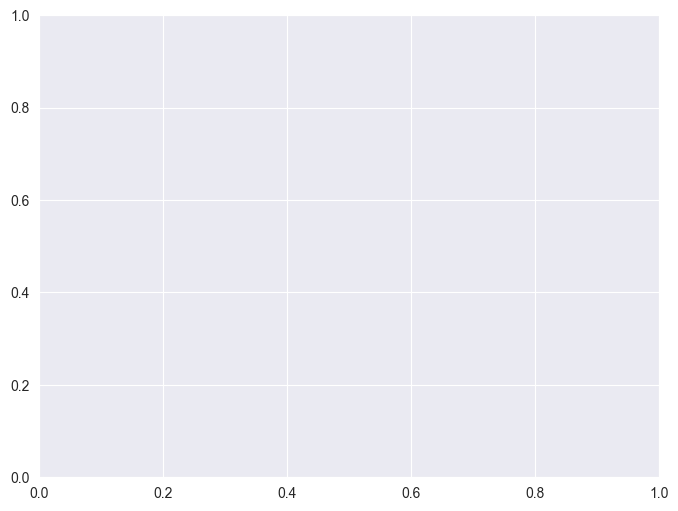

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df_linear.copy()
df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])

X = df.drop('Success_Level', axis=1)
y = df['Success_Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_reduced, y_train)

xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100))


Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')  
plt.title('SVM Decision Surface (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
